In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Initialize RNN

In [2]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100

In [26]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(
    N_inp, N_bar, num_states,
    lr=40., plasticity_bias = -0.45,
    narrow_search_factor=0.5, wide_search_factor=1.5,
    )

# Add predictive skew to RNN weights

In [4]:
identity = np.eye(model.N_bar)
total_delta = np.zeros((model.N_bar, model.N_bar))
n_shifts = 500 
gamma = 0.99
for s in range(1, n_shifts):
    shifted = np.roll(identity, shift=-(s+50), axis=0)
    delta = (gamma**s)*0.04*shifted
    total_delta += delta
model.J_xx += total_delta

In [5]:
cache_states = [n*2 for n in range(50)]

# Run Task (no learning)

In [6]:
_, place_acts, _, _ = model.run_nonrecurrent(place_inputs)
_, cache_acts, _, cache_acts_over_time = model.run_recurrent(place_inputs)
_, pred_acts, _, pred_acts_over_time = model.run_recurrent_r(place_inputs, 0.3)

# Define cache/pred activity as a mean over some time window

In [7]:
steps = 100
start_t = steps-25 # Start of time window

In [8]:
avg_cache_acts = []
for i in range(len(cache_states)):
    location = cache_states[i]
    vec = cache_acts_over_time[start_t:steps, location, :].mean(axis=0)
    avg_cache_acts.append(vec)
avg_cache_acts = np.array(avg_cache_acts)

In [9]:
avg_pred_acts = []
for i in range(len(cache_states)):
    location = cache_states[i]
    vec = pred_acts_over_time[start_t:steps, location, :].mean(axis=0)
    avg_pred_acts.append(vec)
avg_pred_acts = np.array(avg_pred_acts)

# Individual Cells

In [10]:
n_samples = 70

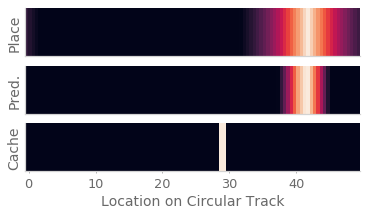

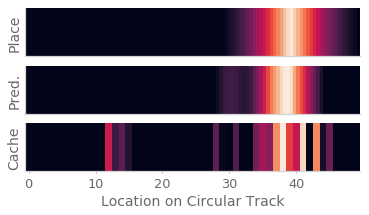

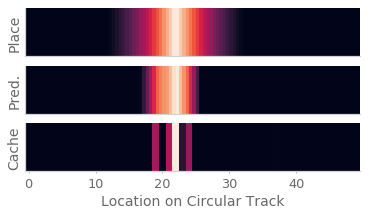

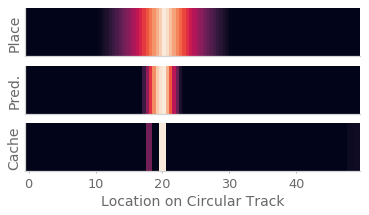

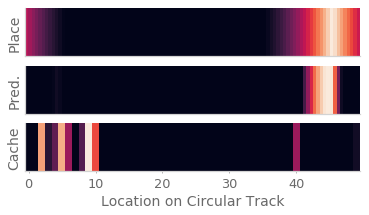

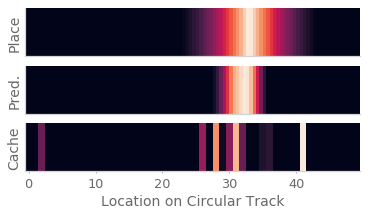

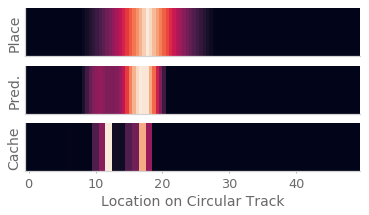

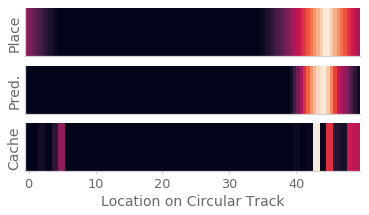

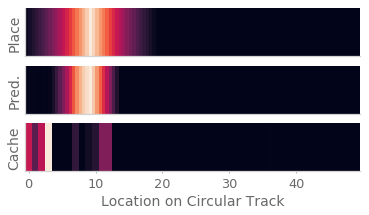

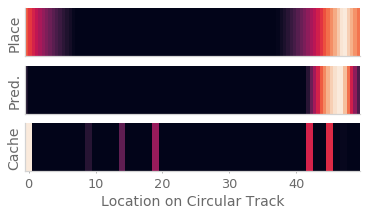

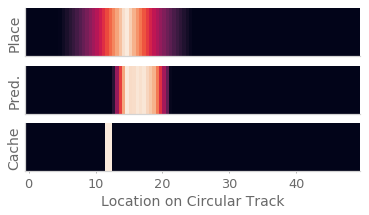

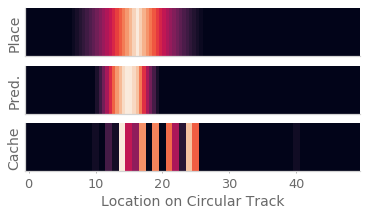

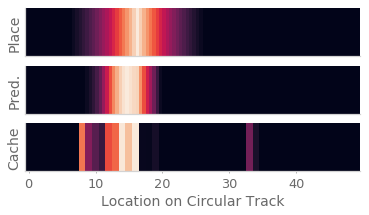

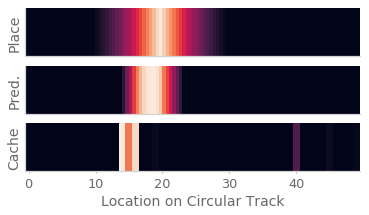

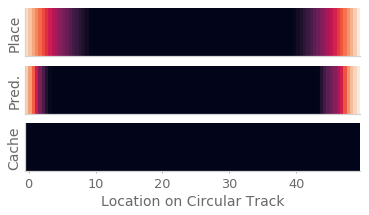

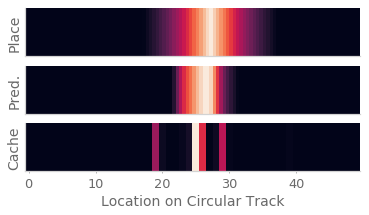

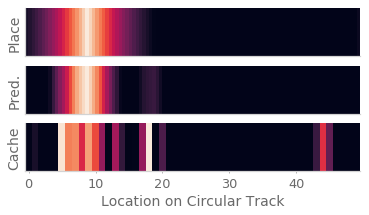

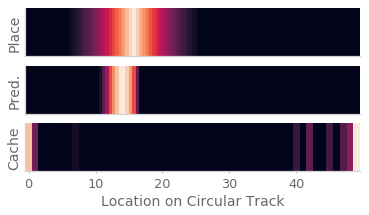

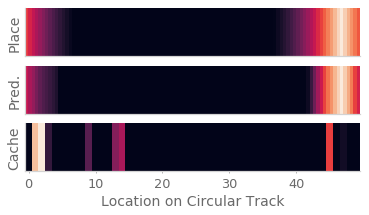

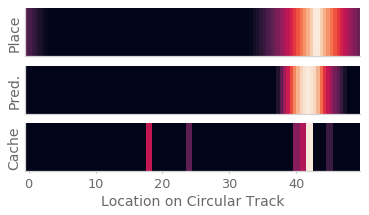

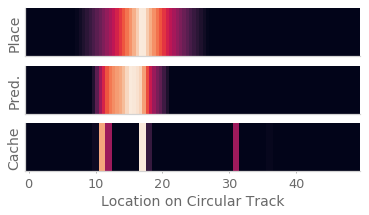

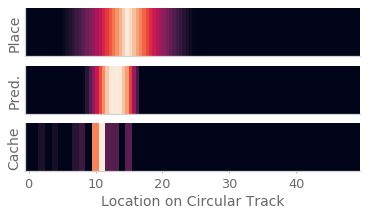

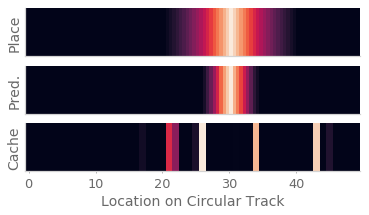

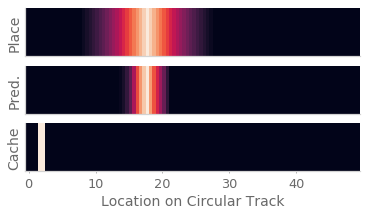

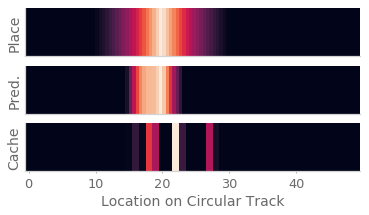

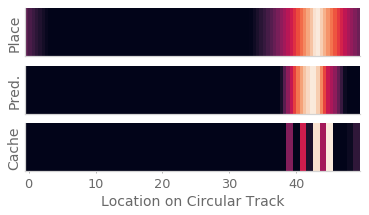

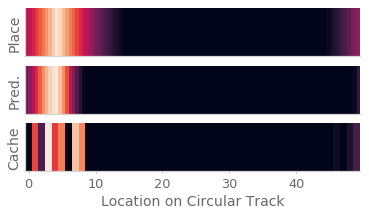

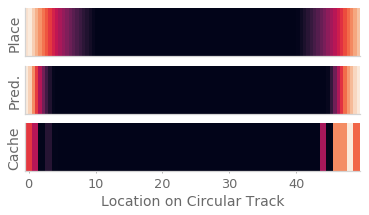

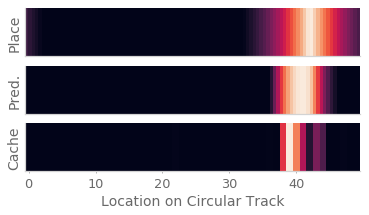

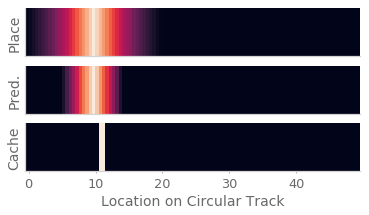

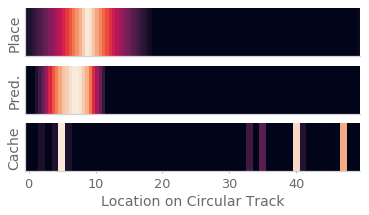

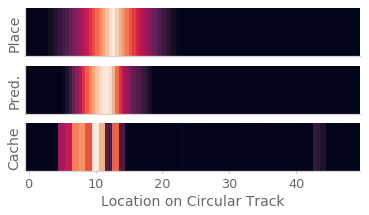

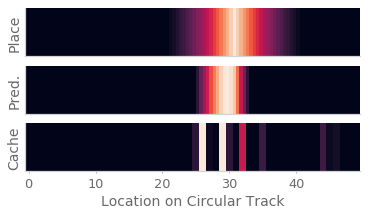

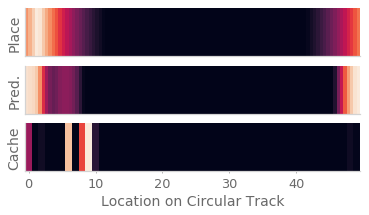

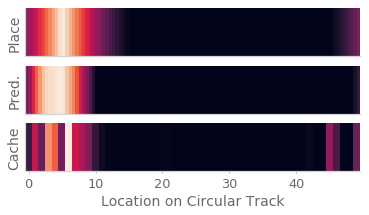

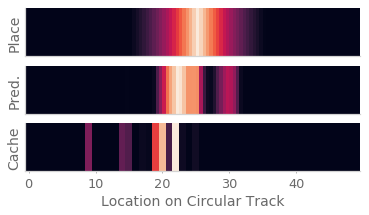

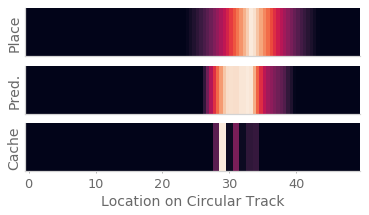

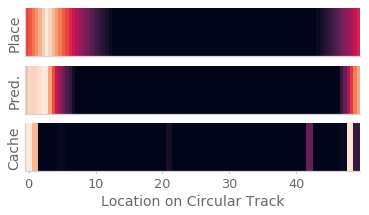

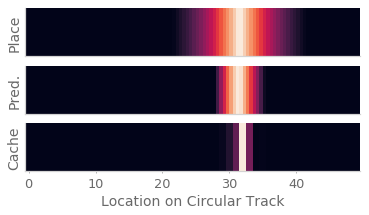

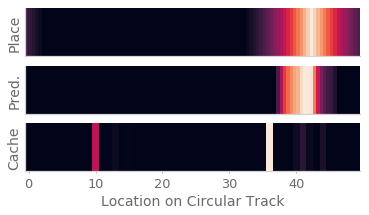

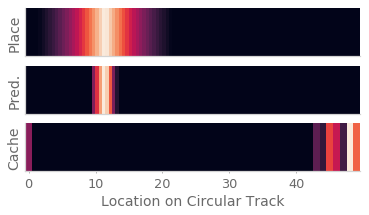

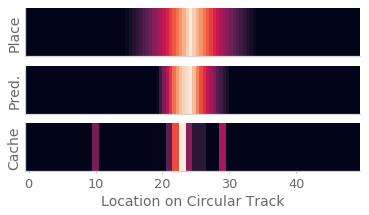

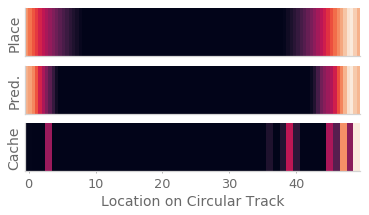

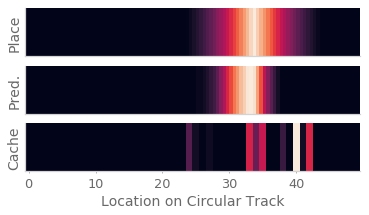

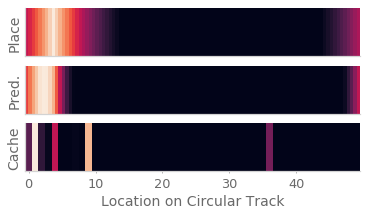

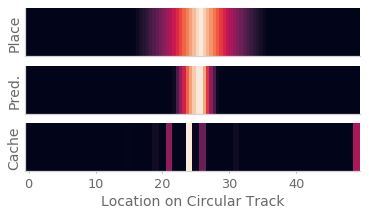

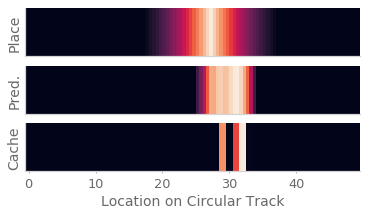

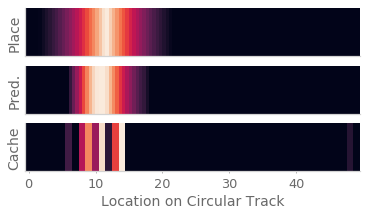

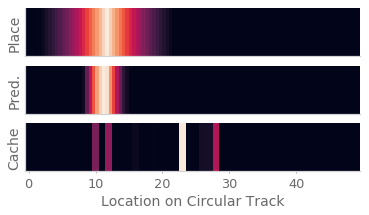

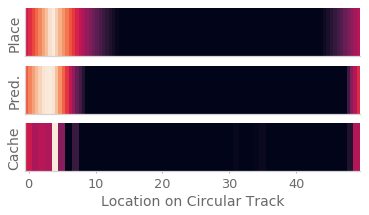

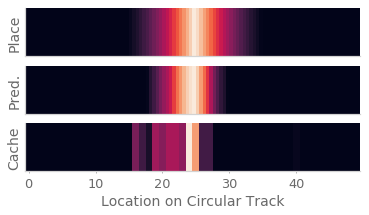

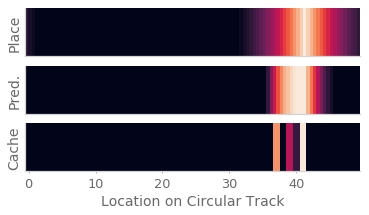

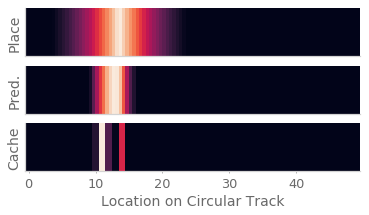

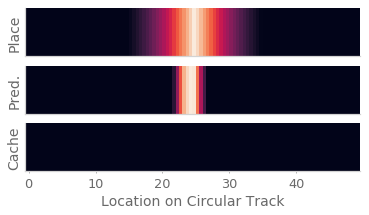

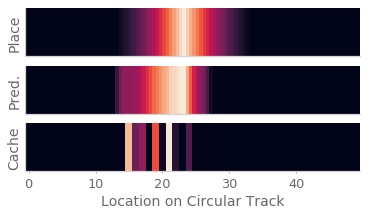

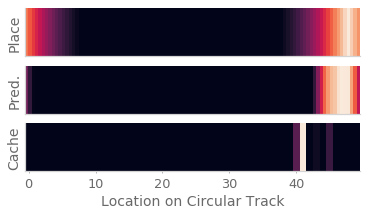

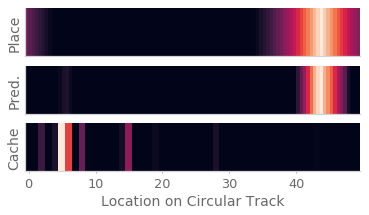

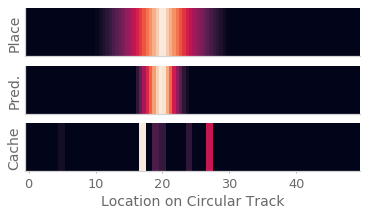

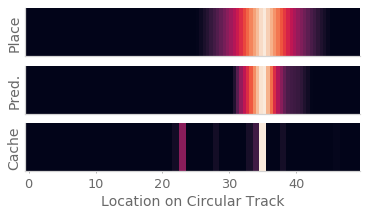

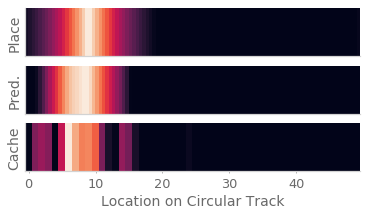

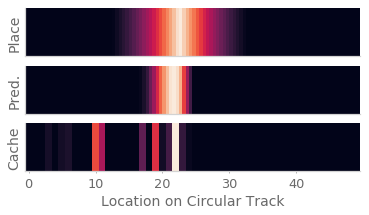

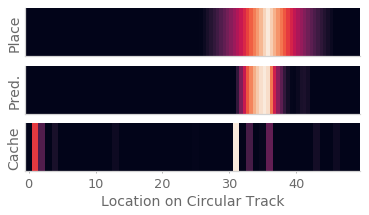

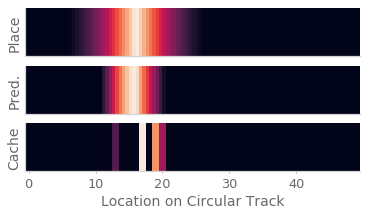

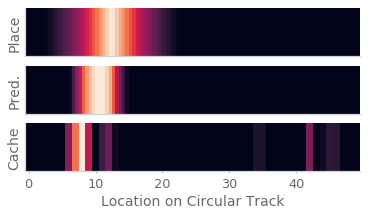

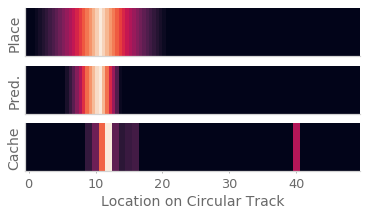

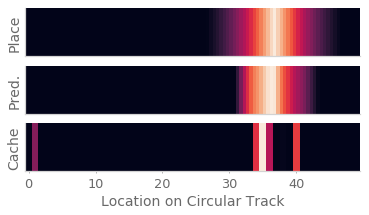

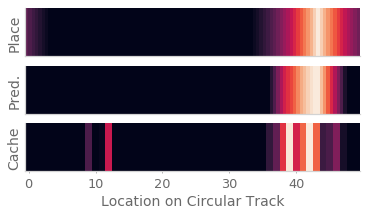

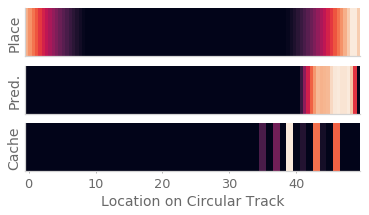

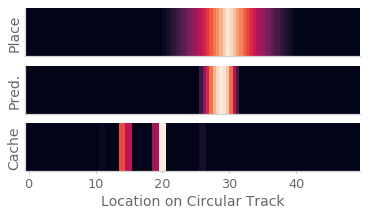

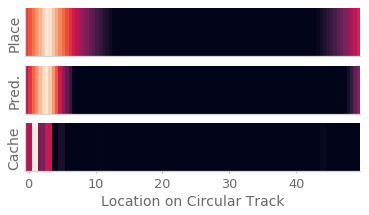

In [25]:
for _ in range(n_samples):
    idx = np.random.choice(N_bar)
    fig, axs = plt.subplots(3, 1, figsize=(6,3))
    axs[0].imshow(place_acts[:, idx].reshape((1,-1)), aspect='auto')
    axs[1].imshow(pred_acts[:,idx].reshape((1,-1)), aspect='auto')
    axs[2].imshow(avg_cache_acts[:,idx].reshape((1,-1)), aspect='auto')
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    axs[2].set_yticks([])
    axs[2].set_xlabel('Location on Circular Track')
    axs[0].set_ylabel('Place')
    axs[1].set_ylabel('Pred.')
    axs[2].set_ylabel('Cache')
    plt.show()

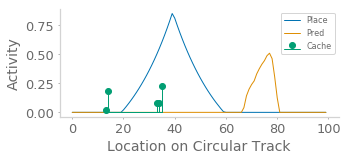

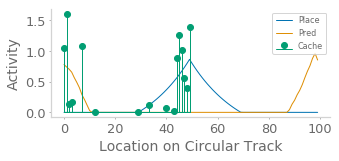

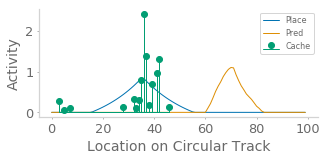

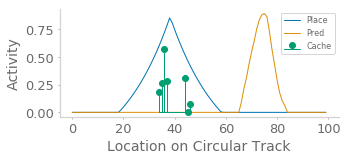

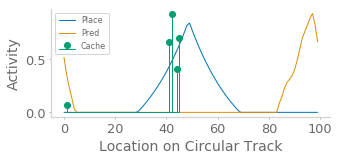

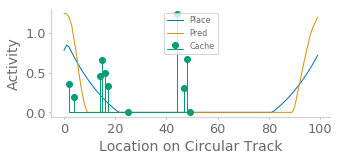

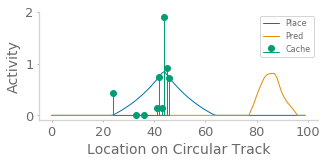

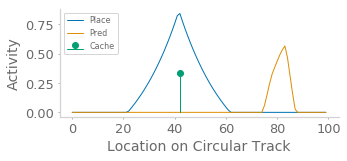

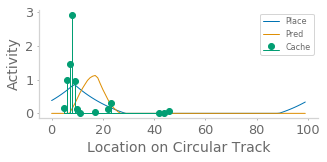

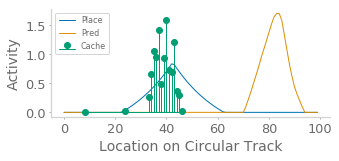

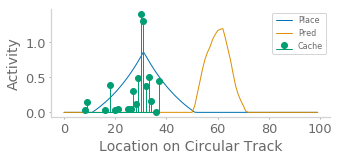

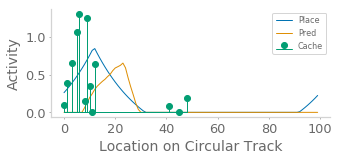

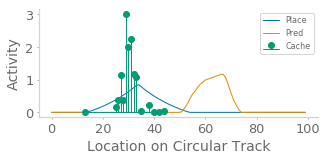

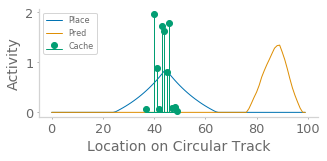

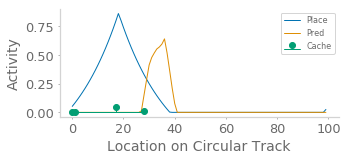

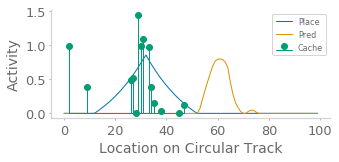

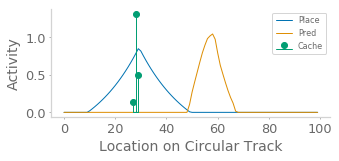

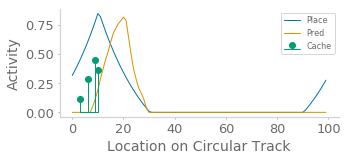

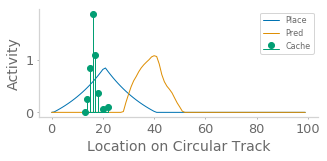

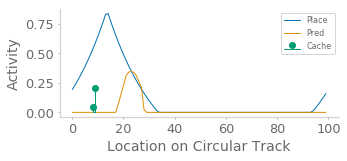

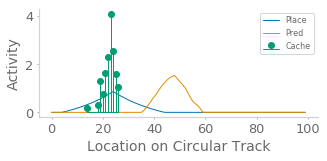

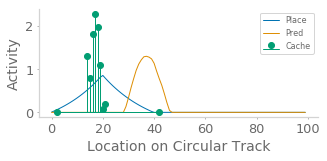

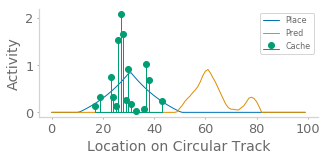

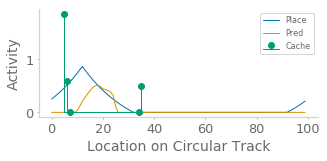

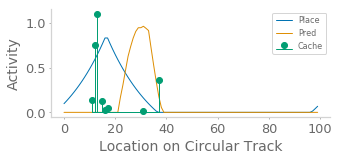

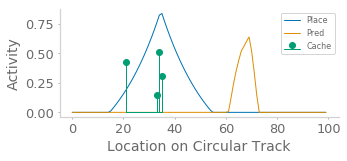

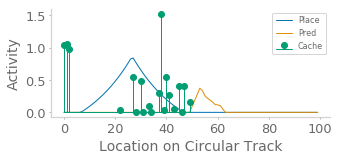

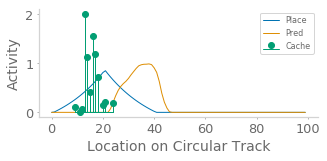

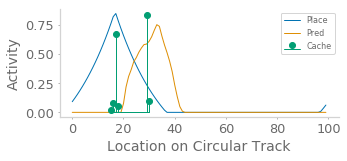

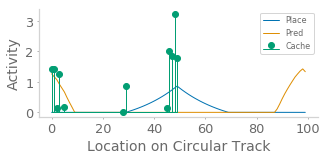

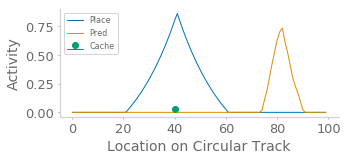

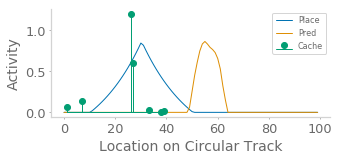

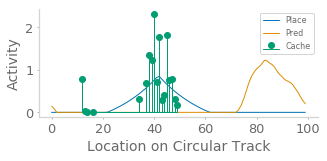

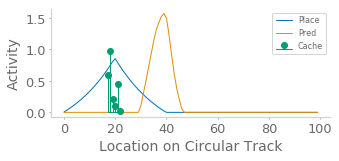

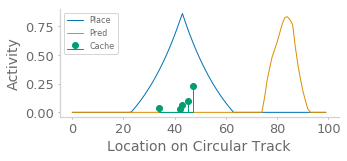

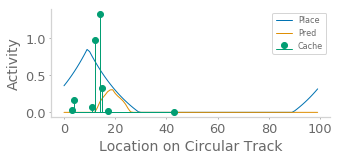

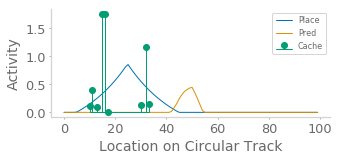

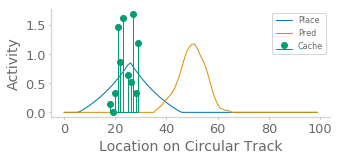

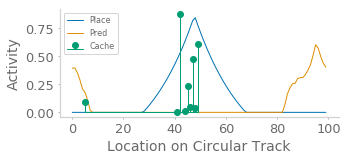

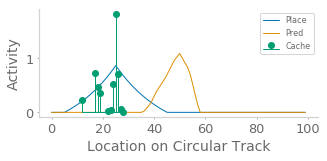

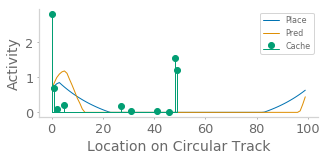

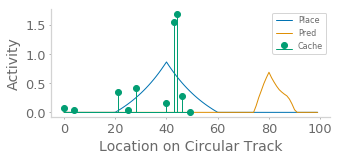

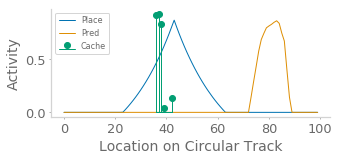

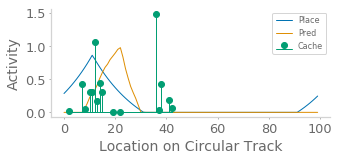

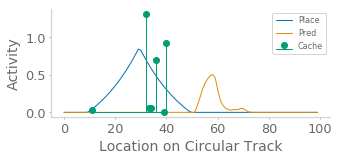

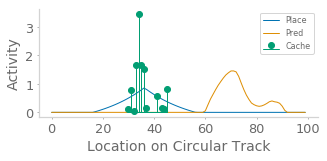

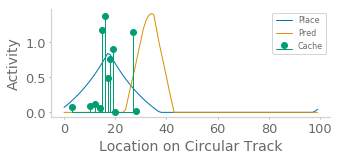

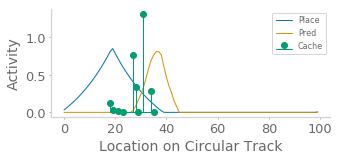

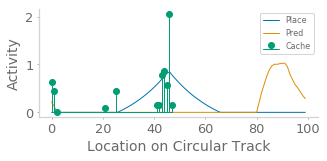

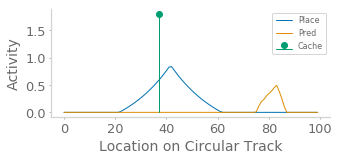

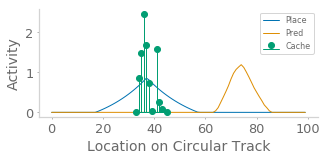

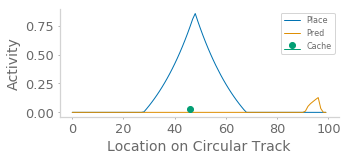

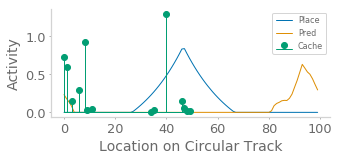

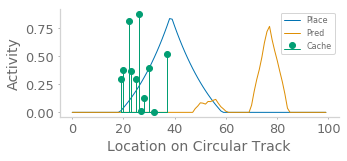

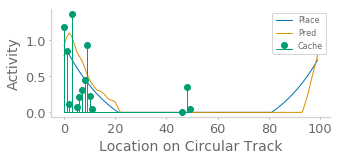

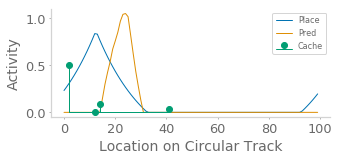

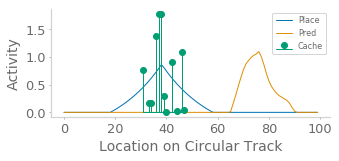

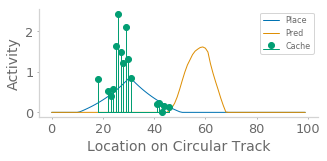

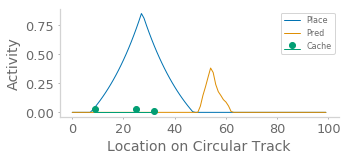

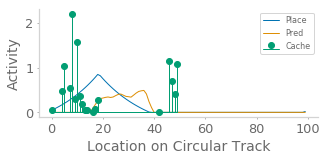

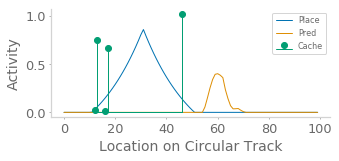

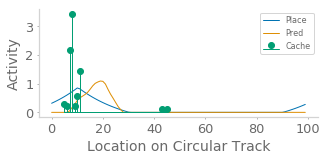

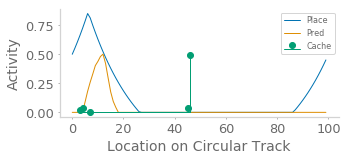

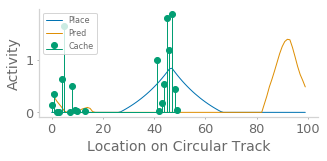

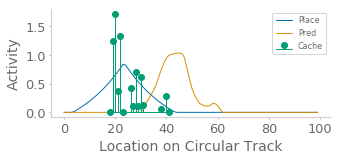

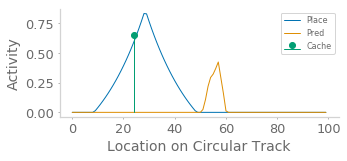

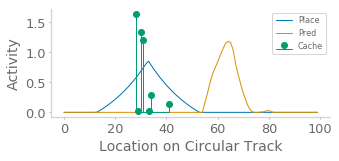

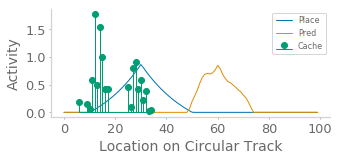

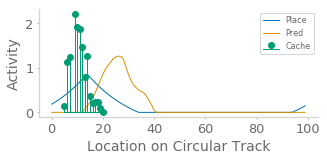

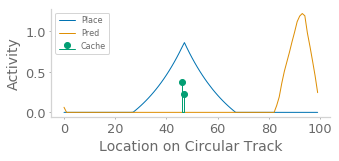

In [34]:
for _ in range(n_samples):
    idx = np.random.choice(N_bar)
    fig, ax = plt.subplots(figsize=(5,2))
    ax.plot(place_acts[:, idx//2].flatten(), label='Place')
    ax.plot(pred_acts[:, idx].flatten(), label='Pred')
    _cache_acts = avg_cache_acts[:, idx].flatten()
    _cache_acts_x = np.argwhere(_cache_acts>0)
    _cache_acts_y = _cache_acts[_cache_acts_x]
    ax.stem(_cache_acts_x, _cache_acts_y, label='Cache',
        linefmt='C2-', markerfmt='C2o', basefmt='C2')
    ax.set_xlabel('Location on Circular Track')
    ax.set_ylabel('Activity')
    plt.legend()
    plt.show()